In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [8]:
data_dir = "../data/yfinance_data"

def load_stock_data(directory):
    all_data = []
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            df = pd.read_csv(f"{directory}/{file}")
            df['Stock'] = file.split('_')[0]
            all_data.append(df)
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df['Date'] = pd.to_datetime(combined_df['Date'])
    return combined_df

stock_data = load_stock_data(data_dir)
stock_data.set_index('Date', inplace=True)

print("Stock data loaded:", stock_data.shape)

Stock data loaded: (45428, 9)


In [9]:
# Cell 2
stock_symbol = 'AAPL'
aapl_data = stock_data[stock_data['Stock'] == stock_symbol].copy()
aapl_data.sort_index(inplace=True)

aapl_data.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [ ]:
# Calculate 20-day simple moving average (SMA)
aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)

# Calculate 14-day RSI
aapl_data['RSI_14'] = talib.RSI(aapl_data['Close'], timeperiod=14)

# Calculate MACD values
macd, macd_signal, macd_hist = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
aapl_data['MACD'] = macd
aapl_data['MACD_signal'] = macd_signal
aapl_data['MACD_hist'] = macd_hist

aapl_data.tail()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,AAPL,224.228500,48.687742,4.662717,6.678882,-2.016164
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,AAPL,224.440500,47.386437,3.748082,6.092722,-2.344640
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,AAPL,224.633500,48.055700,3.026267,5.479431,-2.453164
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,AAPL,225.014500,48.476184,2.448591,4.873263,-2.424672
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,AAPL,225.117001,49.359115,2.012764,4.301163,-2.288399


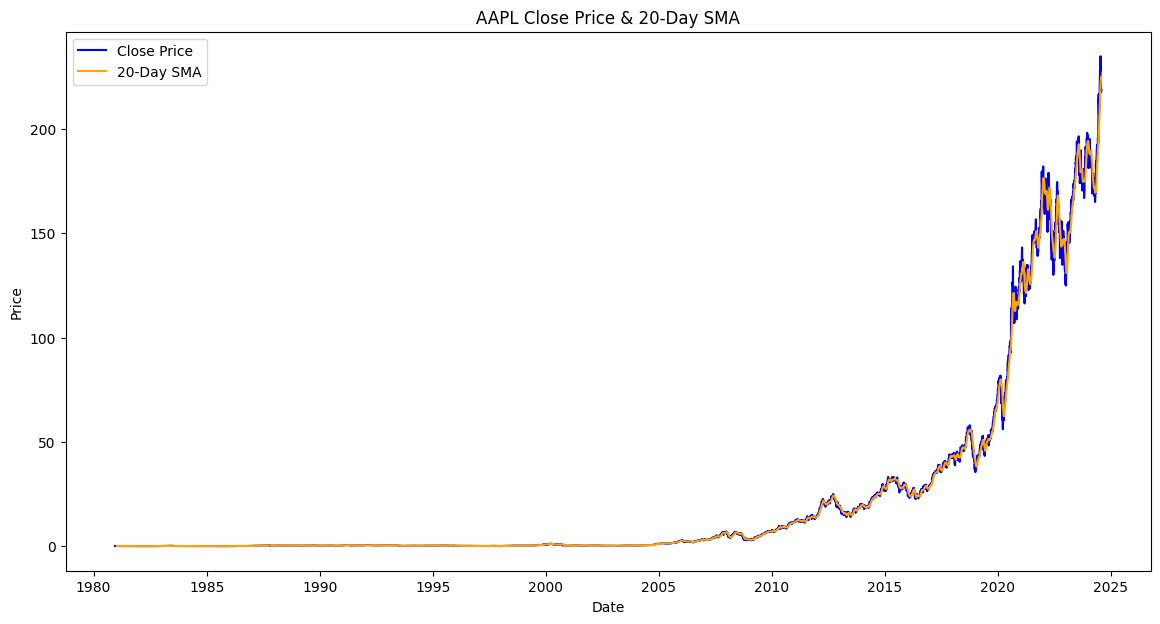

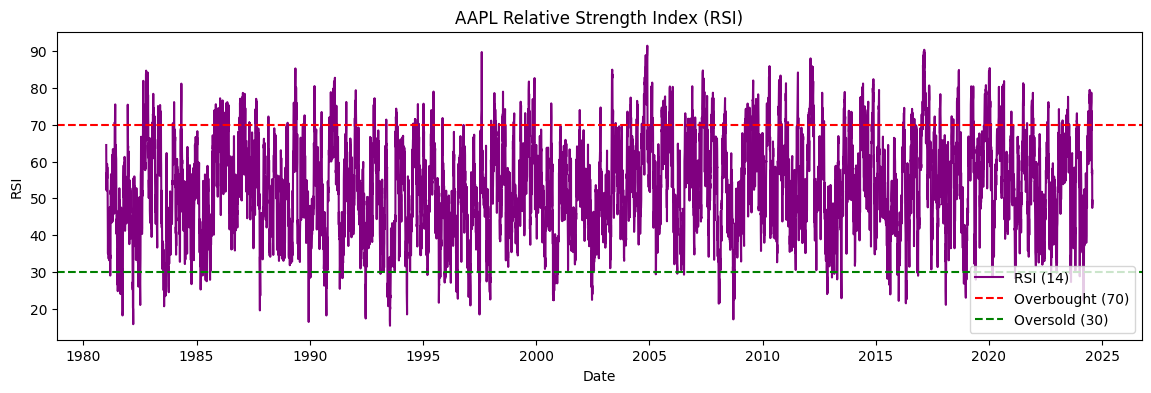

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_data.index, aapl_data['Close'], label='Close Price', color='blue')
plt.plot(aapl_data.index, aapl_data['SMA_20'], label='20-Day SMA', color='orange')
plt.title(f"{stock_symbol} Close Price & 20-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(aapl_data.index, aapl_data['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f"{stock_symbol} Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


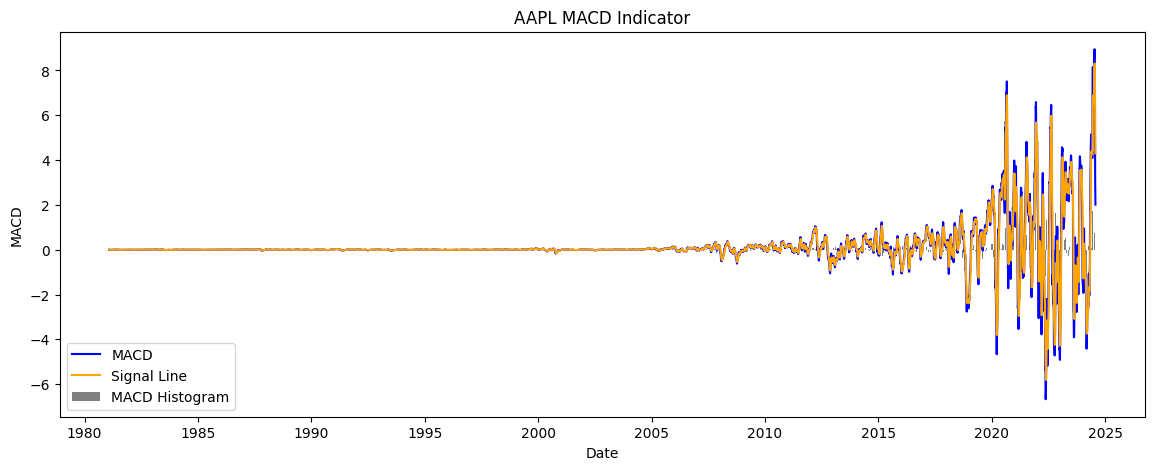

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(aapl_data.index, aapl_data['MACD'], label='MACD', color='blue')
plt.plot(aapl_data.index, aapl_data['MACD_signal'], label='Signal Line', color='orange')
plt.bar(aapl_data.index, aapl_data['MACD_hist'], label='MACD Histogram', color='grey')
plt.title(f"{stock_symbol} MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.show()
